#Classificação de Imagens de Cães x Gatos sem aumento de imagens




###Será Utilizado um Classificador de Imagens Usando o *tf.keras.Sequencial* e para Carregar os Dados Utilizará o *tf.keras.preprocessing.ImageDataGenerator*.

##Importando os Pacotes

``os`` - Para ler aqruivos e estruturas de diretório;

``numpy`` -Para alguma matemática de matriz fora do Tensorflow;

``matplotlib.pyplot`` - Para plotar o gráfico e exibir imagens em nossos dados de treinamento e validação.

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #carregando os dados

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

##Carregando os Dados

O Conjunto de dados que esta sendo utilizado é uma versão filatrada do conjunto de dados Dogs vs Cats do Kaggle.

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip' # Baixando Dogs vs Cats
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True) # Descompactando os aquivos no Colab

68606236/68606236 [==============================] - 2s 0us/step


 Estrutura de diretórios dos arquivos baixados.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>


Listando os diretórios com o seguinte comando de terminal:

In [6]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


Atribuindo variáveis com o caminho do arquivo adequado para o conjunto de treinamento e validação.

In [7]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # diretório com as fotos de gatos de treinamento
train_dogs_dir = os.path.join(train_dir, 'dogs')  # diretório com as fotos de cachorros de treinamento
validation_cats_dir = os.path.join(validation_dir, 'cats')  # diretório com as fotos de gatos de validação
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # diretório com as fotos de chachorro de validação

## Entendendo os Dados

Quantidade de imgagens de cães e gatos no diretório de treinamento e validação.

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


## Definindo os Parâmetros dos Modelos.

Configurando variáveis que serão utilizadas posteriormente durante o processamento.

In [10]:
BATCH_SIZE = 100 # numero de exemplos de treinamento para processar antes de atualizar nossas variáveis de modelos.
IMG_SHAPE = 150 # os dados de treinamento consistem em imagens com largura de 150 pixels e altura de 150 pixels.

## Preparação do Dados

As imagens devem ser formadas em tensores de ponto flutuante pré-procesadas adequadamente antes de serem alimentadas na rede. Por isso, as seguintes estapas são necessárias:

1- Ler a imagens do disco;

2- Decodificar o conteúdo dessas imagens e converter no formado grade adequado de acordo com o conteúdo RGB.

3 - Redimensionar os tensores de valores entre 0 e 255 para valores entre 0 e 1, pois as redes neurais preferem lidar com pequenos valores de entrada.

Essas etapas tarefas pode-se ser feitas usando a classe tf.keras.preprocessing.image.ImageDataGenerator. (ver códifgo abaixo)

In [11]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # gerador para os dados de treinamento
validation_image_generator = ImageDataGenerator(rescale=1./255)  # gerador para os dados de validação

Depois de definir os geradores para imagens de treinamento e validação, o método **flow_from_directory** carregará as imagens do disco, aplicará o redimensionamento e as redimensionará usando uma única linha de código.

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


### Visualizando as Imagens de Treinamento
---



Pode-se visualizar as imagens de treinamento obtendo um lote de imagens do gerador de treinamento. Sendo necessário usar o Matplotlib para plotar algumas delas, caso queira.

In [14]:
sample_training_images, _ = next(train_data_gen) 

A próxima função retorna um lote do conjunto de dados. Um lote é uma tupla de (muitas imagens, muitos rótulos). Por enquanto, estamos descartando os rótulos porque queremos apenas ver as imagens.

In [15]:
# Esta função irá plotar as imagens na forma de uma grade com 1 linha e 5 colunas onde as imagens são colocadas em cada coluna.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

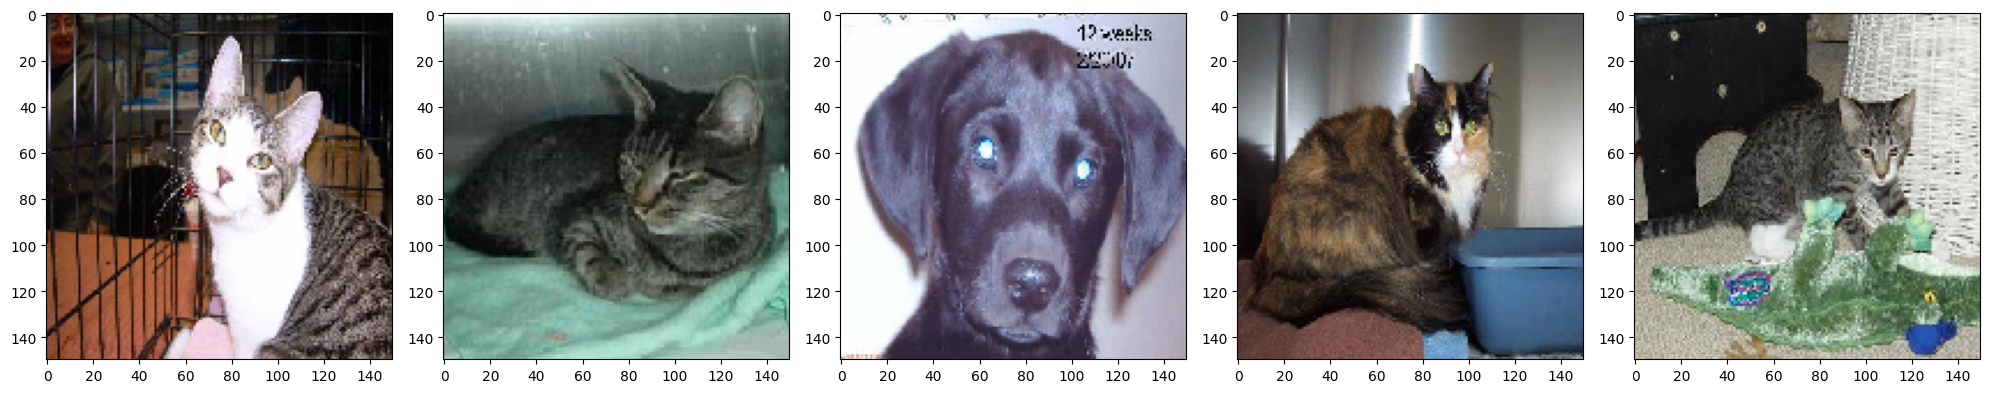

In [16]:
plotImages(sample_training_images[:5]) # Plotar imagens 0-4

## Criação de Modelo

O modelo consiste em quatro blocos de convolução com uma camada de pool máximo em cada um deles. Então temos uma camada totalmente conectada com 512 unidades, com uma função de ativação ``relu``. O modelo produzirá probabilidades de classe para duas classes — cães e gatos — usando ``softmax``.

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

##Compilando o Modelo

Aqui foi utilizado o otimizador adam. Como foi produzido uma categorização sofmax, foi usado sparse_categorical_crossentropy como a função de perda. 
E para observar a precisão e a validação do treinamento em cada época à medida que ia sendo treinada a rede, foi passado alguns argumentos das métricas.


In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##Resumo do Modelo
Para visaulizar todas as camadas da rede utilizou-se o método ``summary``

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Treinando o Modelo

Como os lotes vêm de um gerador (`ImageDataGenerator`), foi usado `fit_generator` em vez de `fit`

In [ ]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

<ipython-input-20-d70e0a339f06>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 143s 7s/step - loss: 0.7154 - accuracy: 0.5090 - val_loss: 0.6867 - val_accuracy: 0.5680
Epoch 2/100
20/20 [==============================] - 140s 7s/step - loss: 0.6735 - accuracy: 0.5915 - val_loss: 0.6832 - val_accuracy: 0.5470
Epoch 3/100
20/20 [==============================] - 137s 7s/step - loss: 0.6494 - accuracy: 0.6210 - val_loss: 0.6259 - val_accuracy: 0.6400
Epoch 4/100
20/20 [==============================] - 133s 7s/step - loss: 0.6191 - accuracy: 0.6695 - val_loss: 0.6062 - val_accuracy: 0.6720
Epoch 5/100
 1/20 [>.............................] - ETA: 2:05 - loss: 0.5886 - accuracy: 0.7000

## Vizualizando os Resultados dos Treinamentos

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Através dos gráficos, pode-se ver que a precisão do treinamento e da validação estão muito distantes e o modelo alcançou apenas cerca de **70%** de precisão no conjunto de validação (dependendo do número de épocas para as quais você treinou).

Esta é uma indicação clara de overfitting. Uma vez que as curvas de treinamento e validação começam a divergir, nosso modelo começou a memorizar os dados de treinamento e não consegue ter um bom desempenho nos dados de validação.